In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re

import pathlib

In [8]:
# 1. ASU weather df
year = ['2017', '2018', '2019', '2020']
asu_j9 = pd.read_csv("./Data/asu_j9.csv", index_col=0)
    
# 2. envimet_J9
envimet_j9 = pd.read_csv("./Data/envimet_j9.csv", index_col=0)

# 3. station
station_j9 = pd.read_csv("./Data/station_j9.csv", index_col=0)


In [9]:
asu_j9 

,Month,Time,Air Temp,Rel Humid,KW,CHWTON
06/09/2018 05:00,6,500,23.555556,28.1,1016.55,572.42
06/09/2018 06:00,6,600,22.944444,30.1,1007.51,548.05
06/09/2018 07:00,6,700,26.222222,33.8,1014.79,606.52
06/09/2018 08:00,6,800,32.333333,14.9,1001.32,719.86
06/09/2018 09:00,6,900,35.555556,11.1,1028.94,734.63
06/09/2018 10:00,6,1000,36.611111,10.6,1035.40,766.52
06/09/2018 11:00,6,1100,37.833333,9.6,1037.36,864.10
06/09/2018 12:00,6,1200,38.888889,9.1,1042.74,860.10
06/09/2018 13:00,6,1300,39.833333,7.9,1045.12,898.95
06/09/2018 14:00,6,1400,41.222222,7.8,1040.87,905.44


,Month,Time,Air Temp,Rel Humid,KW,CHWTON
06/09/2018 05:00,6,500,27.0,14.84,93.54,2.08
06/09/2018 06:00,6,600,26.0,15.74,117.23,1.22
06/09/2018 07:00,6,700,28.0,17.42,103.66,1.36
06/09/2018 08:00,6,800,31.0,11.78,106.36,2.67
06/09/2018 09:00,6,900,33.0,9.06,105.26,2.71
06/09/2018 10:00,6,1000,35.0,7.52,103.63,3.53
06/09/2018 11:00,6,1100,37.0,6.74,105.14,4.02
06/09/2018 12:00,6,1200,39.0,5.19,103.65,5.69
06/09/2018 13:00,6,1300,41.0,4.32,105.62,4.84
06/09/2018 14:00,6,1400,41.0,3.99,102.44,4.79


In [11]:
envimet_j9

,Month,Time,Air Temp,Rel Humid,KW,CHWTON
06/09/2018 05:00,6,500,29.288046,12.926082,93.54,2.08
06/09/2018 06:00,6,600,28.547272,17.865186,117.23,1.22
06/09/2018 07:00,6,700,29.235614,18.867418,103.66,1.36
06/09/2018 08:00,6,800,31.330512,18.101223,106.36,2.67
06/09/2018 09:00,6,900,33.952092,15.256233,105.26,2.71
06/09/2018 10:00,6,1000,35.924490,11.618912,103.63,3.53
06/09/2018 11:00,6,1100,36.924873,9.391644,105.14,4.02
06/09/2018 12:00,6,1200,37.832170,8.080515,103.65,5.69
06/09/2018 13:00,6,1300,38.753659,7.134143,105.62,4.84
06/09/2018 14:00,6,1400,39.469672,6.435761,102.44,4.79


In [14]:
# # 1. Make temp comparison
temp_df = pd.DataFrame()
name = ['station', 'asu', 'envimet ']

dfs = [station_j9, asu_j9, envimet_j9]

# # 2. get air temp in each df
i = 0
for df in dfs:
    temp_df[name[i]] = df['Air Temp']
    i+= 1
temp_df

,station,asu,envimet
06/09/2018 05:00,27.0,23.555556,29.288046
06/09/2018 06:00,26.0,22.944444,28.547272
06/09/2018 07:00,28.0,26.222222,29.235614
06/09/2018 08:00,31.0,32.333333,31.330512
06/09/2018 09:00,33.0,35.555556,33.952092
06/09/2018 10:00,35.0,36.611111,35.924490
06/09/2018 11:00,37.0,37.833333,36.924873
06/09/2018 12:00,39.0,38.888889,37.832170
06/09/2018 13:00,41.0,39.833333,38.753659
06/09/2018 14:00,41.0,41.222222,39.469672


<AxesSubplot:>

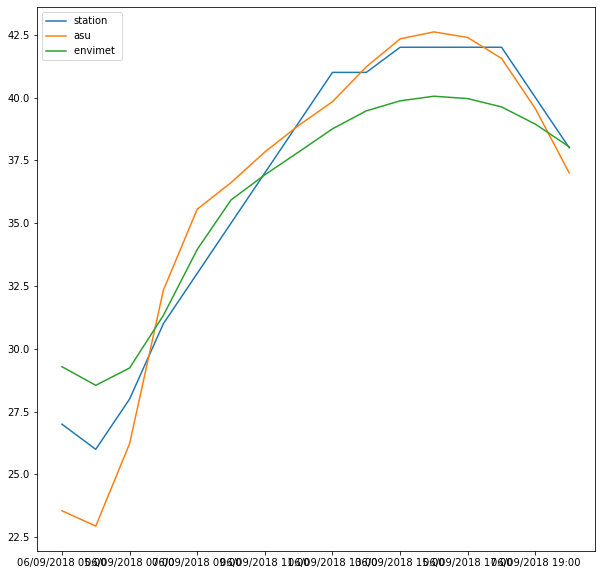

In [17]:
temp_df.plot(figsize=(10, 10))